<a href="https://colab.research.google.com/github/priyadarshpv/Cifar10-ResNet50/blob/main/Cifar10_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.config/kaggle
!mv /content/kaggle.json ~/.config/kaggle/
!chmod 600 ~/.config/kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:34<00:00, 22.6MB/s]
100% 715M/715M [00:34<00:00, 21.7MB/s]


In [4]:
!unzip /content/cifar-10.zip

Archive:  /content/cifar-10.zip
  inflating: sampleSubmission.csv    
  inflating: test.7z                 
  inflating: train.7z                
  inflating: trainLabels.csv         


In [5]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 30.3 MB/s eta 0:00:00


In [6]:
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

Importing Dependencies

In [7]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [8]:
filenames=os.listdir('/content/train')

In [9]:
type(filenames)

list

In [10]:
len(filenames)

50000

Labels Processing

In [11]:
labeldf=pd.read_csv('/content/trainLabels.csv')

In [12]:
labeldf

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [13]:
labeldf['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [14]:
labeldf['label'].replace(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

<ipython-input-14-8c3d2247f7dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  labeldf['label'].replace(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'],[0,1,2,3,4,5,6,7,8,9],inplace=True)
<ipython-input-14-8c3d2247f7dc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [15]:
labeldf

,id,label
0,1,6
1,2,9
2,3,9
3,4,4
4,5,1
...,...,...
49995,49996,2
49996,49997,6
49997,49998,9
49998,49999,1


In [16]:
idlist=list(labeldf['id'])

Image Processing

In [17]:
#Convert images to numpy arrays

train_data_folder='/content/train/'

data=[]

for id in idlist:

  image=Image.open(train_data_folder+str(id)+'.png')
  image=np.array(image)
  data.append(image)

In [18]:
data[0].shape

(32, 32, 3)

In [19]:
X= np.array(data)
Y=np.array(labeldf['label'])

In [20]:
X.shape

(50000, 32, 32, 3)

In [21]:
Y.shape

(50000,)

In [22]:
#scaling

x_scaled=X/255

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=42)

Building the Neural Network

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
num_of_classes=10

model=keras.Sequential([

                        keras.layers.Flatten(input_shape=(32,32,3)),
                        keras.layers.Dense(64,activation='relu'),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(num_of_classes,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2481 - loss: 2.0312 - val_accuracy: 0.3133 - val_loss: 1.8632
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3595 - loss: 1.7852 - val_accuracy: 0.3812 - val_loss: 1.7348
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3826 - loss: 1.7228 - val_accuracy: 0.3842 - val_loss: 1.7159
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3946 - loss: 1.6947 - val_accuracy: 0.3808 - val_loss: 1.7431
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3950 - loss: 1.6828 - val_accuracy: 0.3935 - val_loss: 1.7007
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4073 - loss: 1.6604 - val_accuracy: 0.3977 - val_loss: 1.6785
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4097 - loss: 1.6507 - val_accuracy: 0.3985 - val_loss: 1.6873
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4113 - loss: 1.6347 - 

ResNet50

In [28]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [29]:
convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [30]:
num_of_classes=10

model= models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

In [31]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [33]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 464s 356ms/step - acc: 0.3104 - loss: 2.1310 - val_acc: 0.6973 - val_loss: 0.9832
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 390s 347ms/step - acc: 0.6578 - loss: 1.0631 - val_acc: 0.8447 - val_loss: 0.5293
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 347ms/step - acc: 0.7765 - loss: 0.7315 - val_acc: 0.8860 - val_loss: 0.3986
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 347ms/step - acc: 0.8457 - loss: 0.5462 - val_acc: 0.9038 - val_loss: 0.3291
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 347ms/step - acc: 0.8889 - loss: 0.4193 - val_acc: 0.9093 - val_loss: 0.3037
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 354ms/step - acc: 0.9183 - loss: 0.3299 - val_acc: 0.9233 - val_loss: 0.2629
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 346ms/step - acc: 0.9404 - loss: 0.2562 - val_acc: 0.9283 - val_loss: 0.2506
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 354ms/step - acc: 0.9549 - loss: 0.2114 - val_acc: 0.9310 - val_loss: 0.2424
Epoch 9/

In [34]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 113ms/step - acc: 0.9315 - loss: 0.2307


[0.23885300755500793, 0.9294999837875366]

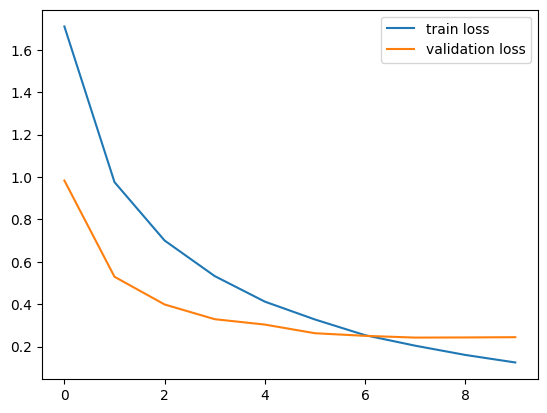

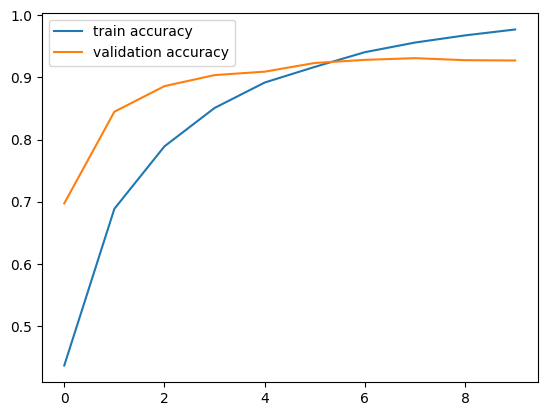

In [35]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

In [36]:
model.save("cifar10_resnet50_model.h5")

In [37]:
model=load_model("/content/cifar10_resnet50_model.h5")

Confusion Matrix and Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 106ms/step


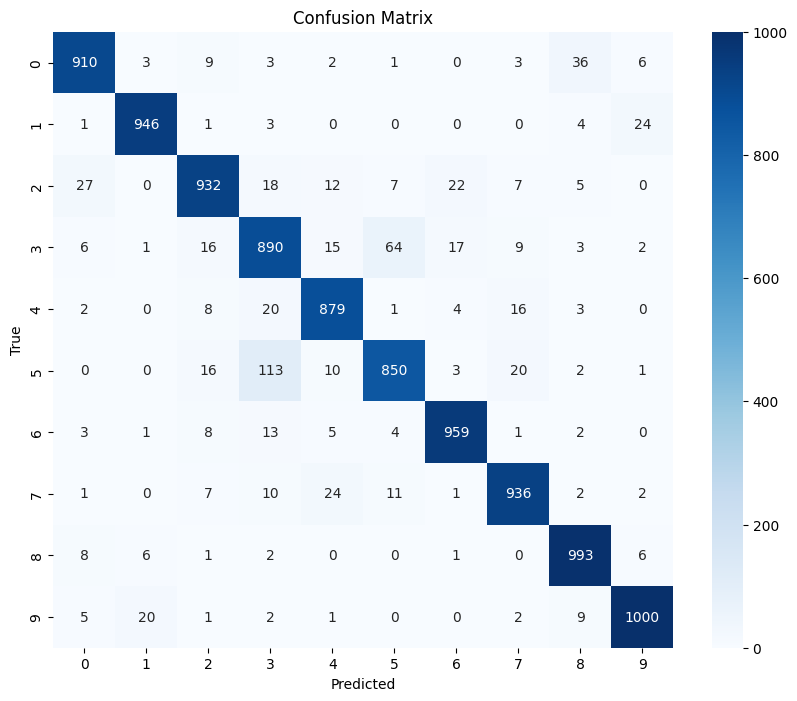

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       973
           1       0.97      0.97      0.97       979
           2       0.93      0.90      0.92      1030
           3       0.83      0.87      0.85      1023
           4       0.93      0.94      0.93       933
           5       0.91      0.84      0.87      1015
           6       0.95      0.96      0.96       996
           7       0.94      0.94      0.94       994
           8       0.94      0.98      0.96      1017
           9       0.96      0.96      0.96      1040

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes))
